In [1]:
import pandas as pd
import numpy as np
from statsmodels.multivariate.manova import MANOVA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel("Heart_data.xlsx")
df.head(5)

,Obs,Sex,Diastolic,Systolic,Height,Weight,Cholesterol,BP_Status,Woking_status
0,1,Female,78,124,62.50,140,281,Normal,Yes
1,2,Female,92,144,59.75,194,181,High,No
2,3,Female,90,170,62.25,132,250,High,Yes
3,4,Female,80,128,65.75,158,242,Normal,Yes
4,5,Male,76,110,66.00,156,281,Optimal,Yes


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Obs,114.0,57.500000,33.052988,1.0,29.25,57.500,85.75,114.00
Diastolic,114.0,82.894737,13.146128,60.0,74.50,80.000,88.00,134.00
Systolic,114.0,137.201754,25.340925,98.0,120.00,132.000,146.00,272.00
Height,114.0,65.065789,3.329117,59.0,62.25,64.625,67.50,72.75
Weight,114.0,150.140351,24.605876,91.0,134.00,148.000,165.00,231.00
Cholesterol,114.0,227.947368,41.496528,150.0,196.50,225.000,263.00,339.00


In [15]:
male=df[df["Sex"]=="Male"]

In [16]:
male.describe().T

,count,mean,std,min,25%,50%,75%,max
Obs,46.0,50.369565,30.771819,5.0,21.75,47.500,70.7500,104.00
Diastolic,46.0,81.608696,13.337463,60.0,72.00,78.000,89.5000,134.00
Systolic,46.0,133.521739,19.898341,98.0,120.50,131.000,144.0000,210.00
Height,46.0,67.994565,2.391239,62.5,66.25,67.875,69.9375,72.75
Weight,46.0,165.652174,22.326086,122.0,152.25,165.000,180.5000,231.00
Cholesterol,46.0,230.369565,43.420609,150.0,198.50,225.000,263.0000,319.00


In [17]:
female=df[df["Sex"]=="Female"]

In [18]:
female.describe().T

,count,mean,std,min,25%,50%,75%,max
Obs,68.0,62.323529,33.883224,1.0,32.50,64.50,90.5,114.00
Diastolic,68.0,83.764706,13.041973,60.0,76.00,81.00,88.0,130.00
Systolic,68.0,139.691176,28.311306,106.0,120.00,132.00,152.5,272.00
Height,68.0,63.084559,2.231311,59.0,61.75,62.75,64.5,68.75
Weight,68.0,139.647059,20.233536,91.0,124.75,140.00,149.0,194.00
Cholesterol,68.0,226.308824,40.387769,150.0,196.00,224.50,261.5,339.00


In [19]:
Y=df[df["Woking_status"]=="Yes"]

In [22]:
Y.head(4)

,Obs,Sex,Diastolic,Systolic,Height,Weight,Cholesterol,BP_Status,Woking_status
0,1,Female,78,124,62.50,140,281,Normal,Yes
2,3,Female,90,170,62.25,132,250,High,Yes
3,4,Female,80,128,65.75,158,242,Normal,Yes
4,5,Male,76,110,66.00,156,281,Optimal,Yes


In [21]:
Y.shape

(101, 9)

In [3]:
manova = MANOVA.from_formula('Diastolic +Systolic + Cholesterol +Weight ~Sex + Woking_status', data=df)
result = manova.mv_test()
print(result.summary())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0881 4.0000 108.0000 279.5874 0.0000
         Pillai's trace  0.9119 4.0000 108.0000 279.5874 0.0000
 Hotelling-Lawley trace 10.3551 4.0000 108.0000 279.5874 0.0000
    Roy's greatest root 10.3551 4.0000 108.0000 279.5874 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
            Sex           Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.6686 4.0000 108.0000 13.3845 0.0000
           Pillai's trace 0.3314 4.0000 108.0000 13.3845 0.

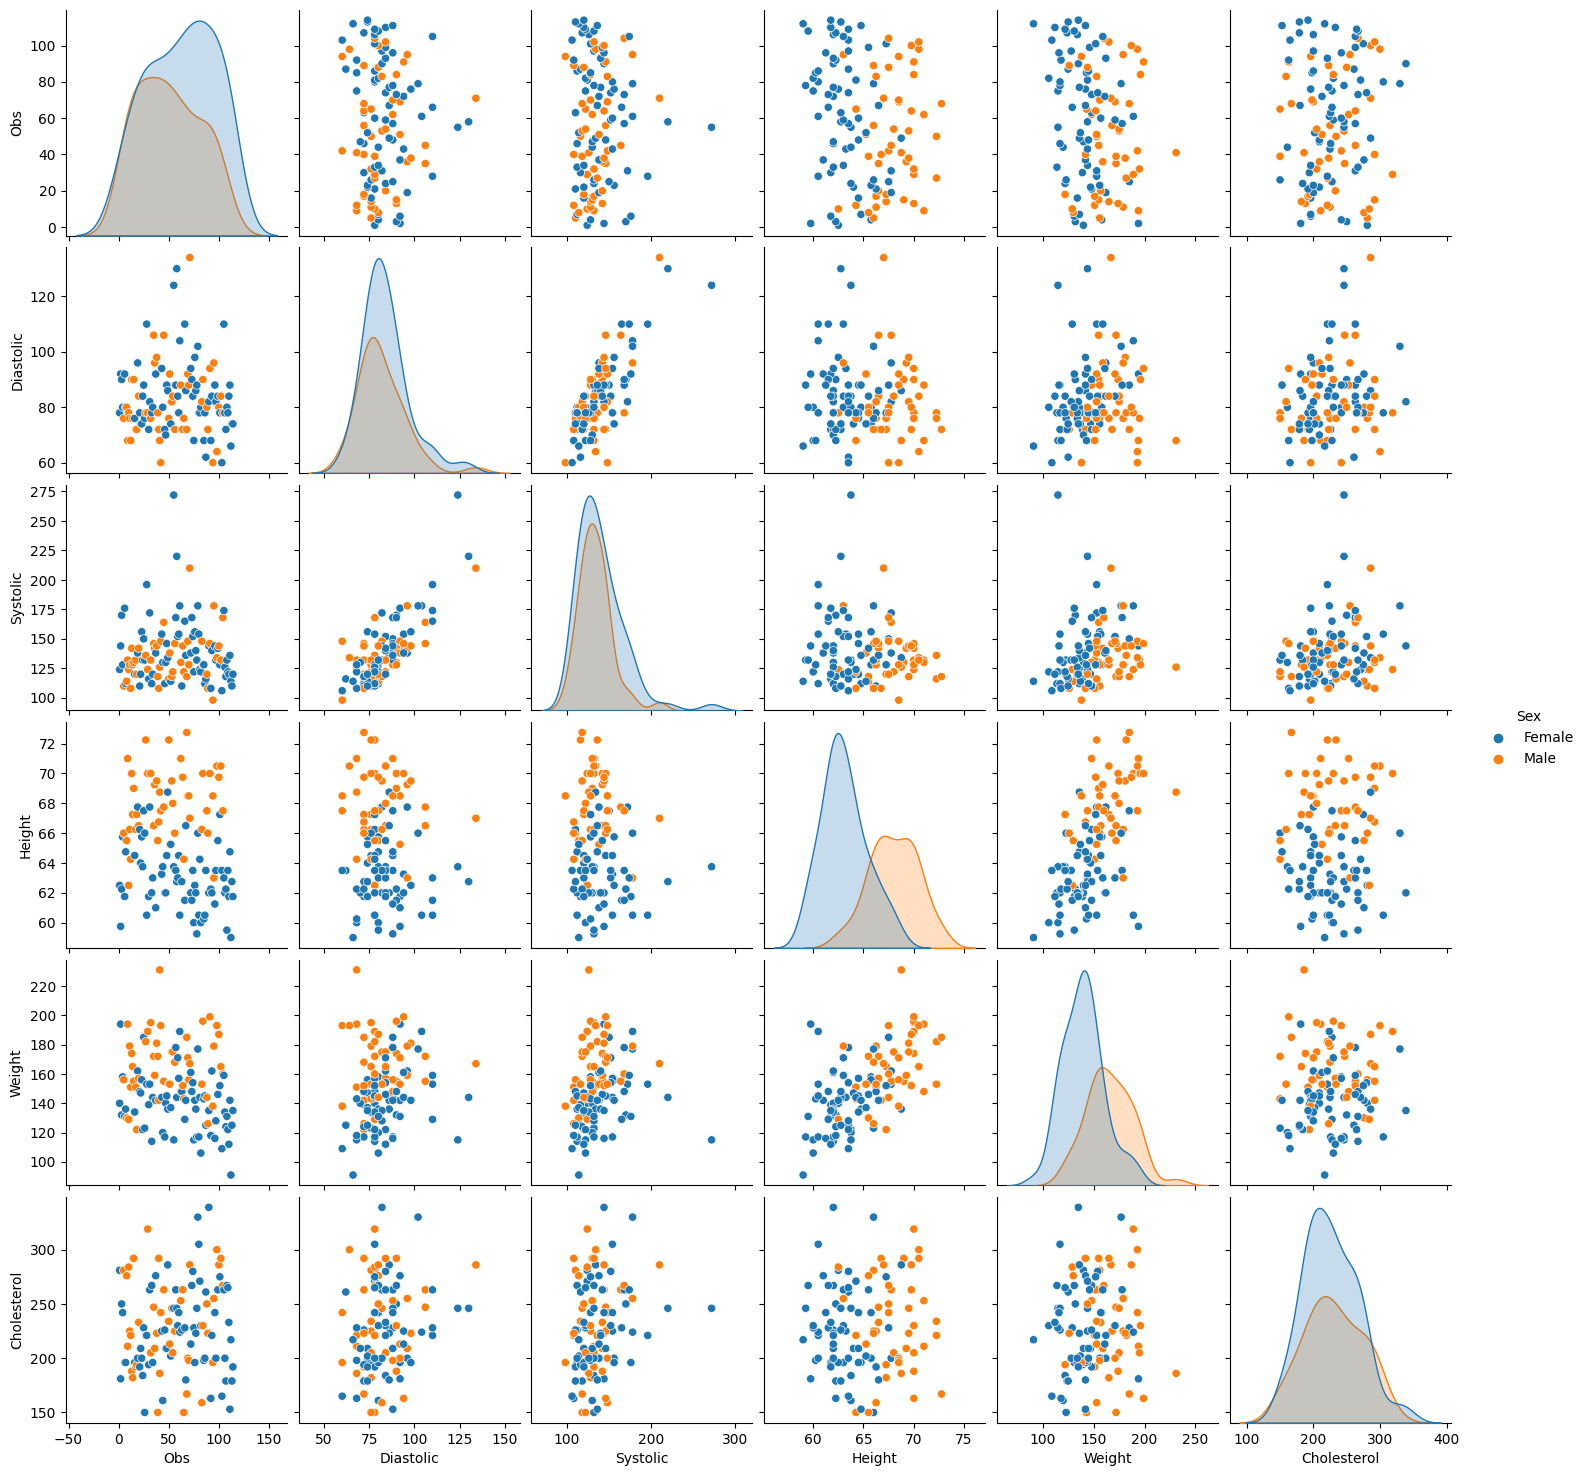

In [4]:
sns.pairplot(df,hue='Sex')
plt.show()

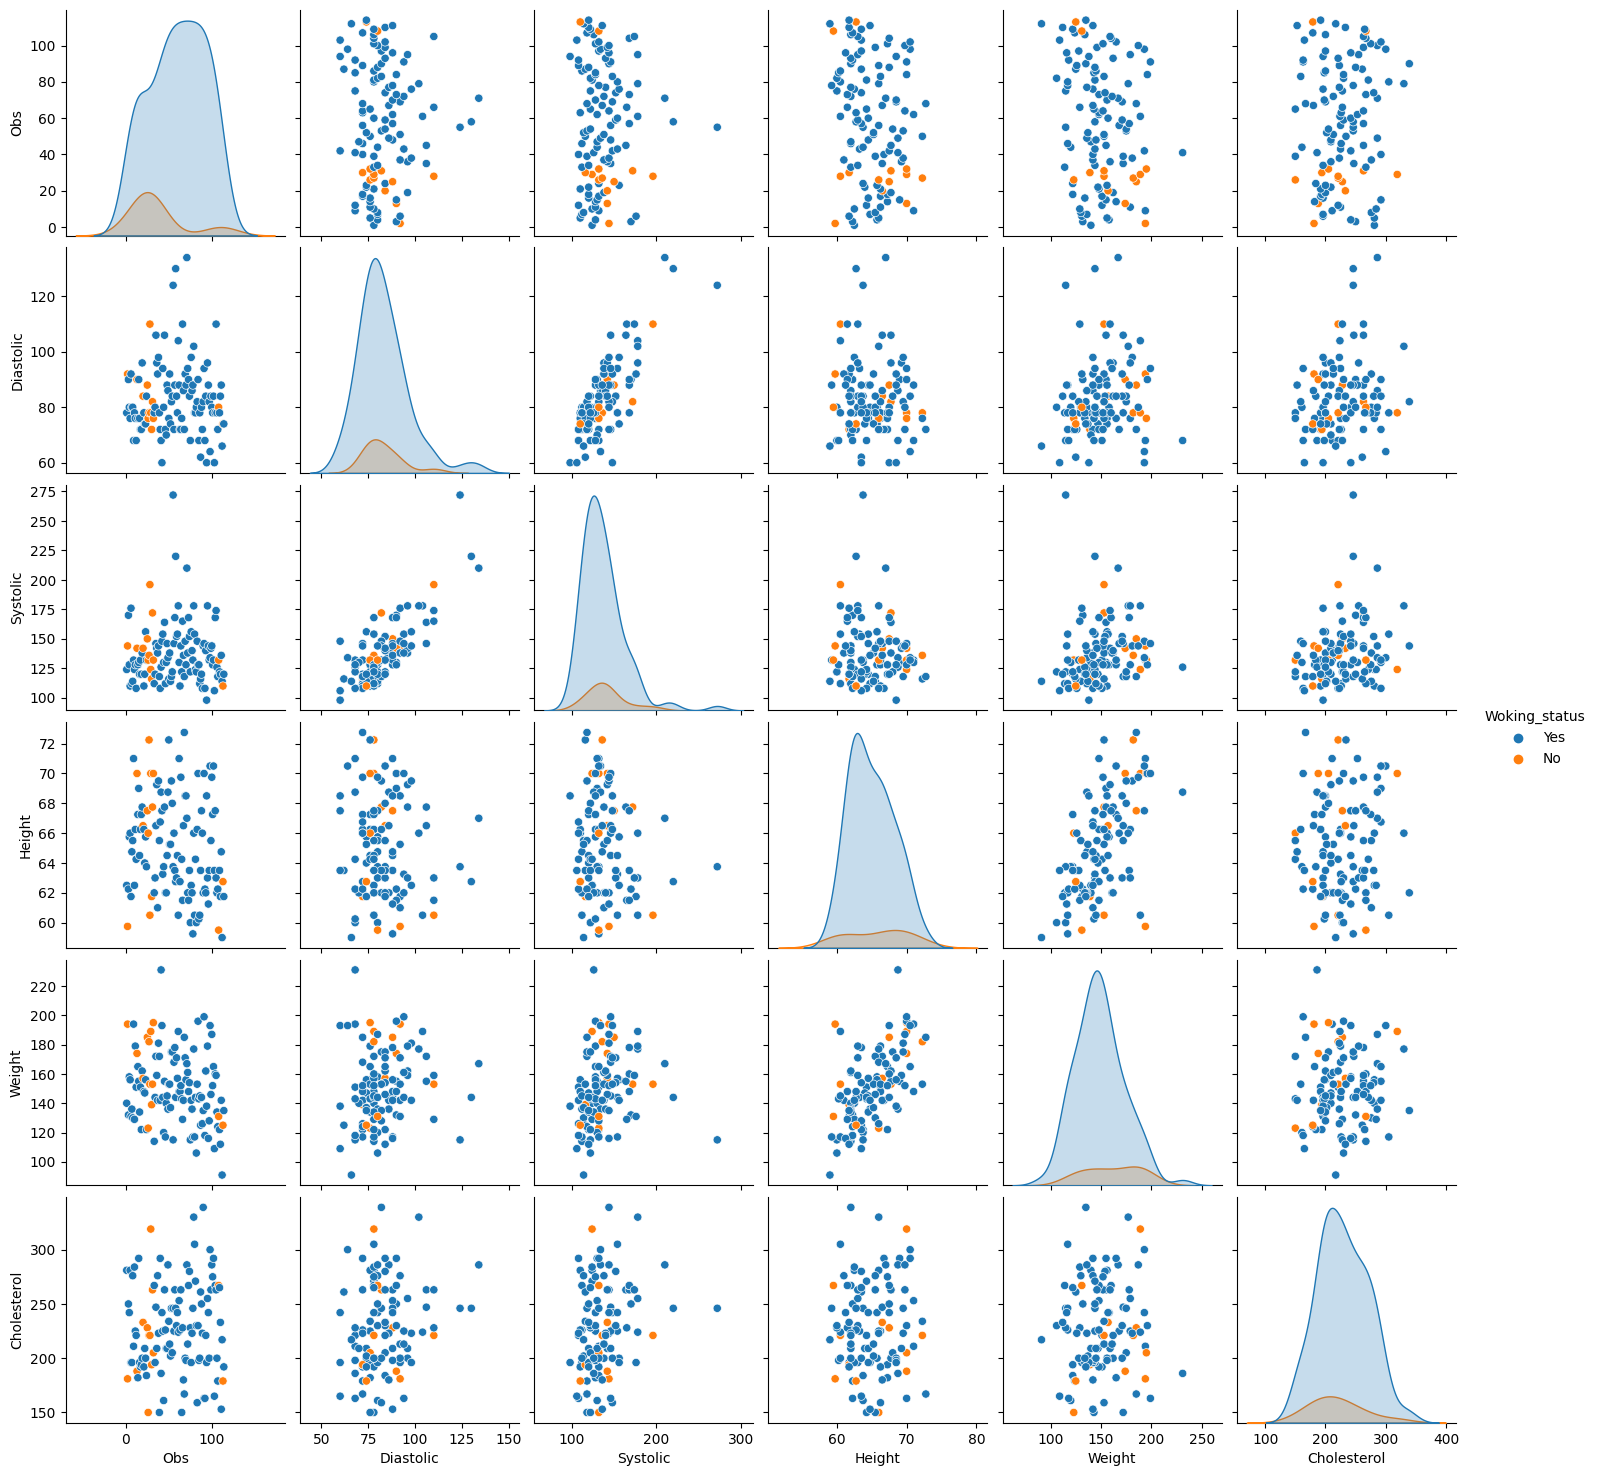

In [5]:
sns.pairplot(df,hue='Woking_status')
plt.show()